In [35]:
import pandas as pd
import json

In [36]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [37]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [38]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [39]:
# lets create a new column with the spacy doc object
df['doc'] = df['comment'].apply(lambda x: nlp(x))

In [40]:
# lets create a new column with the length of the comment
df['length'] = df['doc'].apply(lambda x: len(x))

In [41]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [42]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['doc'].apply(lambda x: nlp(x)._.blob.polarity)

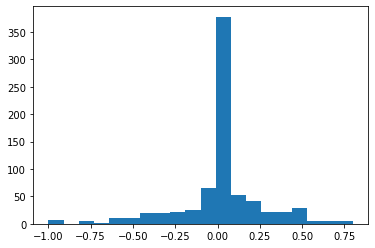

In [43]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=20)
plt.show()

In [44]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,doc,length,sentiment
80,Newton + Bernoulli are insufficient. Come on y...,&gt;&gt;400713992&gt; journalist writes someth...,"(&, gt;&gt;400713992&gt, ;, journalist, writes...",29,-0.8
371,My mother is Portuguese and my father is Anglo...,"&gt;&gt;400713791&gt;Am I basically a mutt?No,...","(&, gt;&gt;400713791&gt;Am, I, basically, a, m...",12,-0.6
92,jews admitted everything about ww2https://www....,&gt;&gt;400711793That wasn’t by a Jew…It is a ...,"(&, gt;&gt;400711793That, was, n’t, by, a, Jew...",14,-0.7
384,&gt;SIRS! PLEASE BRING THE BLOODY POOPOO BOWL ...,&gt;&gt;400709162Imagine not fasting before so...,"(&, gt;&gt;400709162Imagine, not, fasting, bef...",18,-0.8
322,&gt;There are people on this board now who uni...,&gt;&gt;400714593Looks like fucking mordor.,"(&, gt;&gt;400714593Looks, like, fucking, mord...",6,-0.6


In [45]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,doc,length,sentiment
192,&quot;Don&#039;t forget to blame anime culture...,&gt;&gt;400710063&gt;Women should have their o...,"(&, gt;&gt;400710063&gt;Women, should, have, t...",10,0.6000
347,&gt;Woman becomes chadwe got too cocky anti tr...,"&gt;&gt;400703267Chad.?,..kek...It&#039;s not ...","(&, gt;&gt;400703267Chad.?,, .., kek, ..., It&...",12,0.7000
448,&gt;go to dollar store&gt;everything is $1.25A...,&gt;&gt;400713674&gt;1.25 for lithium ion bomb...,"(&, gt;&gt;400713674&gt;1.25, for, lithium, io...",17,0.7875
244,Alien abduction is just people who get drugged...,Ayy lmao,"(Ayy, lmao)",2,0.6000
445,&gt;go to dollar store&gt;everything is $1.25A...,$1.25 for lithium ion bombs is a good deal tho...,"($, 1.25, for, lithium, ion, bombs, is, a, goo...",12,0.7000


In [46]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['doc'].apply(lambda x: nlp(x)._.blob.subjectivity)

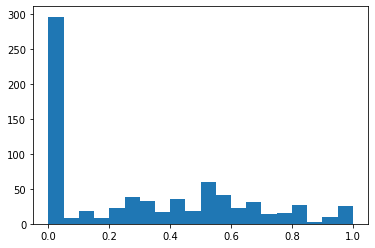

In [47]:
# lets plot the subjectivity of the comments
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [48]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
87,"New York man opens door to his $1,100-a-month ...",&gt;&gt;400710033That&#039;s the point :^),"(&, gt;&gt;400710033That&#039;s, the, point, :...",7,0.750000,1.000000
592,How does a society survive when bombarded with...,&gt;&gt;400712205That&#039;s sadly supposed to...,"(&, gt;&gt;400712205That&#039;s, sadly, suppos...",28,-0.033333,0.533333
116,&gt;journos ranting about deepfakes&gt;artists...,&gt;&gt;400706684The characters grew up with u...,"(&, gt;&gt;400706684The, characters, grew, up,...",9,0.500000,1.000000
240,How do we combat the rampant Anti-Asian racism...,&gt;&gt;400700355I can literally own a house a...,"(&, gt;&gt;400700355I, can, literally, own, a,...",33,0.405519,0.758929
359,Remember that story a couple days ago about a ...,&gt;&gt;400713825And you won&#039;t do shit,"(&, gt;&gt;400713825And, you, won&#039;t, do, ...",6,-0.200000,0.800000


In [49]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
740,"Himars is the wonderwaffen of this war, stop b...",&gt;&gt;400711084Sus.,"(&, gt;&gt;400711084Sus, .)",3,0.000000,0.00
258,"Putler dood, wat nou",&gt;&gt;400714296&gt;&quot;No not the heckin w...,"(&, gt;&gt;400714296&gt;&quot;No, not, the, he...",11,0.000000,0.00
556,how can we reduce the number of chinese and in...,"go back shitskin, that’s how. Your English is ...","(go, back, shitskin, ,, that, ’s, how, ., Your...",12,-0.116667,0.30
538,what happens here,&gt;&gt;400706127...and America has walkable c...,"(&, gt;&gt;400706127, ..., and, America, has, ...",53,-0.152727,0.32
620,"The Krug Man, dropping the hard truth bombs on...",&gt;&gt;400677157this&gt;cities print money&gt...,"(&, gt;&gt;400677157this&gt;cities, print, mon...",14,-0.033333,0.00


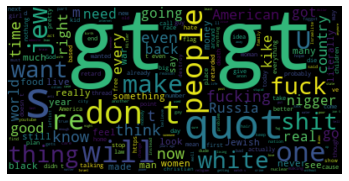

<Figure size 1440x720 with 0 Axes>

In [50]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

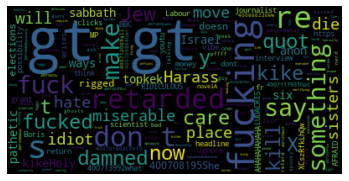

<Figure size 1440x720 with 0 Axes>

In [51]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [52]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())